In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

In [5]:

data = pd.read_excel("/content/15min_dataset_pre_NN.xlsx", sheet_name="Sheet1")

data = data.astype(float)

data.dropna(inplace=True)

X = data.drop(columns=["Rozsev 0-5"]).values
y = data["Rozsev 0-5"].values

# Splitting the dataset into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=1234)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_temp = scaler.transform(X_temp)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert numpy arrays to PyTorch tensors for training, validation, and testing data
X_train = torch.from_numpy(X_train.astype(np.float32))
X_val = torch.from_numpy(X_val.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_val = torch.from_numpy(y_val.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# Reshape target tensors to have shape (batch_size, 1)
y_train = y_train.view(y_train.shape[0], 1)
y_val = y_val.view(y_val.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [6]:
class MyModelRozsev(nn.Module):
    def __init__(self, n_input_features, hidden_size1, hidden_size2):
        super(MyModelRozsev, self).__init__()
        self.hidden1 = nn.Linear(n_input_features, hidden_size1)
        self.dropout = nn.Dropout(0.2)
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        self.dropout
        self.output = nn.Linear(hidden_size2, 1)

    def forward(self, x):

        x = self.hidden1(x)
        x = torch.relu(x)
        x = self.dropout(x)

        x = self.hidden2(x)
        x = torch.relu(x)
        x = self.dropout(x)

        x = self.output(x)
        x = torch.relu(x)

        return x


# Get the number of samples and features in the dataset
n_samples, n_features = X.shape

# Create an instance of the MyModelLogistic class with the number of input features as the argument
model = MyModelRozsev(n_features, 64, 32)
# Accessing parameters
for param in model.parameters():
    # Print each parameter of the model (weights and bias)
   print(param)

Parameter containing:
tensor([[-0.0777,  0.1981, -0.1638,  ...,  0.0531,  0.0230, -0.0029],
        [-0.0323, -0.1100, -0.1843,  ...,  0.1386, -0.1959,  0.0069],
        [-0.0233,  0.1216,  0.1849,  ..., -0.1652, -0.0645,  0.0004],
        ...,
        [-0.1776,  0.1845,  0.0460,  ..., -0.1180,  0.1016, -0.0144],
        [-0.1819,  0.0992, -0.0898,  ..., -0.1829,  0.1063,  0.1407],
        [ 0.1188, -0.0957, -0.1782,  ..., -0.0101, -0.1025, -0.0593]],
       requires_grad=True)
Parameter containing:
tensor([-0.1850,  0.0700, -0.0760,  0.1253, -0.1892, -0.1406,  0.1296,  0.0443,
         0.0074,  0.0362,  0.0855, -0.1588,  0.1895, -0.0311, -0.1776, -0.0582,
         0.0094, -0.0453,  0.1779,  0.1718, -0.0883, -0.0298, -0.1828,  0.0932,
         0.0814, -0.1762,  0.1432, -0.0328,  0.1653,  0.0552, -0.1123,  0.0190,
         0.0830,  0.1072,  0.0387, -0.0746,  0.0837, -0.0896, -0.1937, -0.1530,
        -0.0410, -0.0267, -0.1507,  0.0053,  0.1781, -0.1719, -0.1724, -0.0765,
         0.0957

In [7]:
# Define your loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=0.00001)  # Adam optimizer

Epoch [0/5000], Train Loss: 120.9407, Val Loss: 116.9151
Epoch [100/5000], Train Loss: 115.9535, Val Loss: 112.0621
Epoch [200/5000], Train Loss: 103.0560, Val Loss: 99.6557
Epoch [300/5000], Train Loss: 86.7547, Val Loss: 84.0874
Epoch [400/5000], Train Loss: 68.1702, Val Loss: 66.2277
Epoch [500/5000], Train Loss: 51.5701, Val Loss: 49.1379
Epoch [600/5000], Train Loss: 38.7033, Val Loss: 36.1933
Epoch [700/5000], Train Loss: 29.0063, Val Loss: 29.0907
Epoch [800/5000], Train Loss: 24.8924, Val Loss: 26.1635
Epoch [900/5000], Train Loss: 23.7778, Val Loss: 24.6116
Epoch [1000/5000], Train Loss: 22.3778, Val Loss: 23.4691
Epoch [1100/5000], Train Loss: 23.3704, Val Loss: 22.5895
Epoch [1200/5000], Train Loss: 20.0522, Val Loss: 21.8346
Epoch [1300/5000], Train Loss: 20.8988, Val Loss: 21.1867
Epoch [1400/5000], Train Loss: 21.3108, Val Loss: 20.6591
Epoch [1500/5000], Train Loss: 20.2526, Val Loss: 20.2013
Epoch [1600/5000], Train Loss: 19.9201, Val Loss: 19.8362
Epoch [1700/5000], Tr

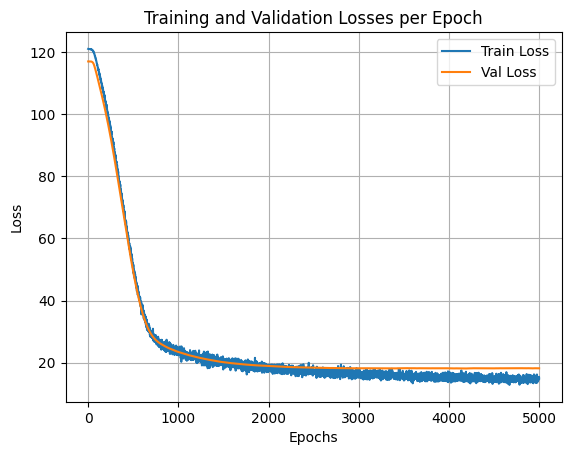

In [8]:
def train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val, num_epochs=100, batch_size=32):
    train_losses = []  # List to store training losses
    val_losses = []    # List to store validation losses

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0

        # Mini-batch training
        for i in range(0, len(X_train), batch_size):
            # Get mini-batch inputs and labels
            inputs = X_train[i:i+batch_size]
            labels = y_train[i:i+batch_size]

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Calculate average training loss for the epoch
        train_loss = running_loss / (len(X_train) / batch_size)
        train_losses.append(train_loss)

        # Validation
        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            val_losses.append(val_loss.item())

        # Print progress every epoch
        if epoch % 100 == 0:
          print(f'Epoch [{epoch}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    return train_losses, val_losses

# Train the model
num_epochs = 5000
train_losses, val_losses = train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val, num_epochs, batch_size=32)

# Plotting the losses
epochs = range(1, num_epochs+1)  # x-axis values (epochs)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses per Epoch')
plt.legend()
plt.grid(True)
plt.show()
